In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import gzip

import swifter

In [2]:
df = pd.read_csv('Amazon_Latest.csv')

In [3]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulness_score,user_deviation,review_delay,stem_words,lem_words
0,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",0.800000,1.399189,6652800,"['im', 'profession', 'otr', 'truck', 'driver',...","['im', 'professional', 'otr', 'truck', 'driver..."
1,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",0.955556,0.624437,0,"['well', 'say', 'ive', 'unit', 'truck', 'four'...","['well', 'say', 'ive', 'unit', 'truck', 'four'..."
2,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",0.900000,0.510375,6566400,"['go', 'write', 'long', 'review', 'even', 'tho...","['going', 'write', 'long', 'review', 'even', '..."
3,A3QH8VQDE7HZCR,0972683275,costaricachris,"[15, 19]",Quality was excellent. Instructions were clear...,5.0,Real value for the money,1286236800,"10 5, 2010",0.789474,0.442171,2678400,"['qualiti', 'excel', 'instruct', 'clear', 'cle...","['quality', 'excellent', 'instruction', 'clear..."
4,A38FGQVJM18OWV,0972683275,"George S. Mitchell ""gsmitchell""","[8, 18]",I checked around Amazon as well as some other ...,1.0,What a piece of junk!,1291161600,"12 1, 2010",0.444444,1.616074,7603200,"['check', 'around', 'amazon', 'well', 'site', ...","['checked', 'around', 'amazon', 'well', 'site'..."


In [3]:
df2 = pd.read_csv('Amazon_Latest_Data.csv')

In [4]:
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulness_score,user_deviation,review_delay,stem_words,lem_words,stem_sim_words,lem_sim_words
0,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",0.800000,1.399189,6652800,"['im', 'profession', 'otr', 'truck', 'driver',...","['im', 'professional', 'otr', 'truck', 'driver...",['5'],"['rand', 'route', 'weight', 'take', 'time', 'l..."
1,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",0.955556,0.624437,0,"['well', 'say', 'ive', 'unit', 'truck', 'four'...","['well', 'say', 'ive', 'unit', 'truck', 'four'...",[],"['dock', 'feature', 'car', 'determine', 'home'..."
2,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",0.900000,0.510375,6566400,"['go', 'write', 'long', 'review', 'even', 'tho...","['going', 'write', 'long', 'review', 'even', '...",[],"['screen', 'road', 'rand', 'route', 'truck', '..."
3,A3QH8VQDE7HZCR,0972683275,costaricachris,"[15, 19]",Quality was excellent. Instructions were clear...,5.0,Real value for the money,1286236800,"10 5, 2010",0.789474,0.442171,2678400,"['qualiti', 'excel', 'instruct', 'clear', 'cle...","['quality', 'excellent', 'instruction', 'clear...",[],"['level', 'hardware']"
4,A38FGQVJM18OWV,0972683275,"George S. Mitchell ""gsmitchell""","[8, 18]",I checked around Amazon as well as some other ...,1.0,What a piece of junk!,1291161600,"12 1, 2010",0.444444,1.616074,7603200,"['check', 'around', 'amazon', 'well', 'site', ...","['checked', 'around', 'amazon', 'well', 'site'...",[],"['tv', 'mount']"


In [6]:
text_params = pd.read_csv('Text_Parameters.to_csv')

In [8]:
len(text_params)

81275

In [9]:
text_params['helpfulness_score'] = df2['helpfulness_score']

In [10]:
text_params.head()

,reviewText,flesch_reading_ease,helpfulness_score,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard,sentence_count
0,"I'm a professional OTR truck driver, and I bou...",-336.56,0.800000,0.0,166.3,7.69,211.1,26.44,44,14.000000,176.92,-1th and 0th grade,1
1,"Well, what can I say. I've had this unit in m...",-340.96,0.955556,0.0,165.9,9.72,210.8,26.37,94,8.666667,175.64,165th and 166th grade,2
2,"Not going to write a long review, even thought...",85.52,0.900000,7.3,6.2,5.92,7.2,5.87,36,7.666667,13.01,5th and 6th grade,23
3,Quality was excellent. Instructions were clear...,66.94,0.789474,10.8,7.1,8.05,6.3,6.99,11,7.200000,14.00,6th and 7th grade,5
4,I checked around Amazon as well as some other ...,-43.22,0.444444,0.0,53.6,8.09,67.2,12.20,15,4.400000,61.55,53th and 54th grade,1


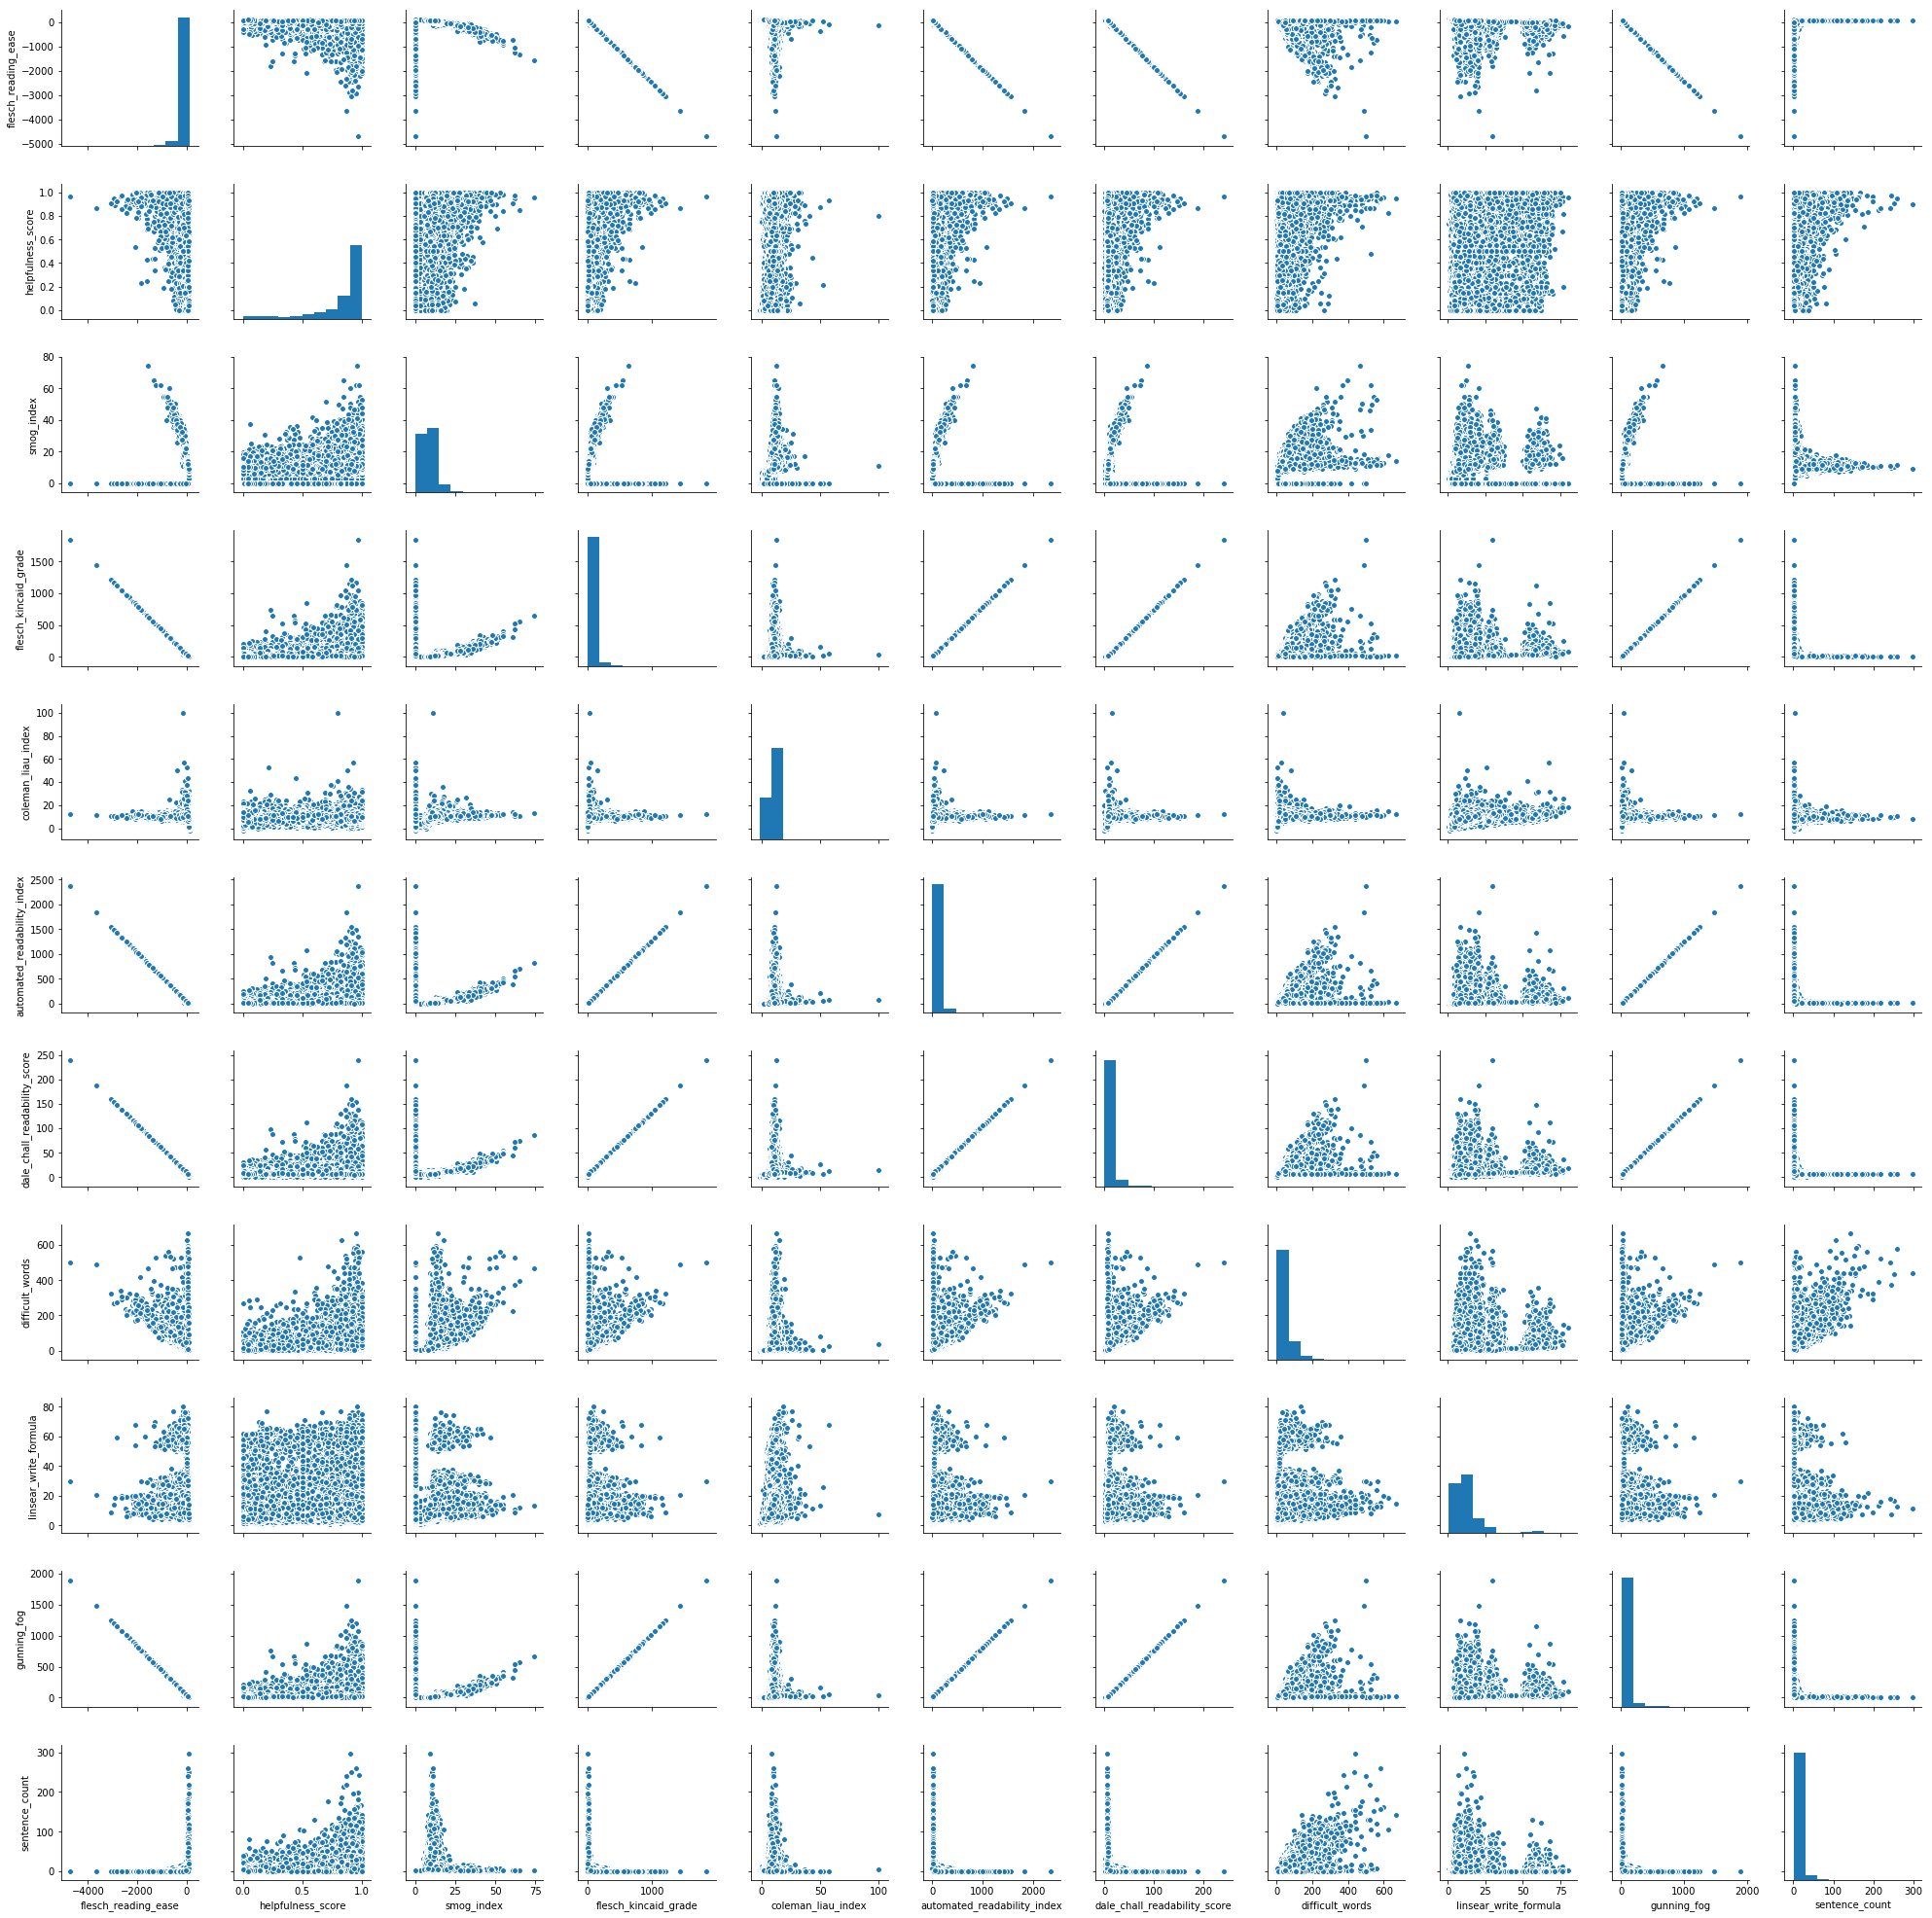

In [11]:
sns.pairplot(text_params)

In [14]:
text_params.columns

Index(['reviewText', 'flesch_reading_ease', 'helpfulness_score', 'smog_index',
       'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'text_standard', 'sentence_count'],
      dtype='object')

In [15]:
X = text_params[['flesch_reading_ease', 'smog_index',
       'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog', 'sentence_count']]

In [47]:
X = text_params[['flesch_reading_ease', 'smog_index',
       'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words']]

In [48]:
y = text_params['helpfulness_score']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [55]:
coeff_df

,Coefficient
difficult_words,0.001242


In [56]:
predictions = lm.predict(X_test)

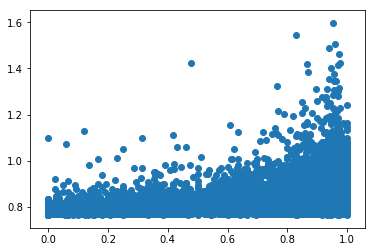

In [57]:
plt.scatter(y_test,predictions)

In [58]:
y_test.head(10)

51704    0.931034
29896    0.975610
9419     0.909091
77612    1.000000
7954     1.000000
49873    0.989130
40127    0.230769
14495    0.909091
50635    0.948276
79232    0.583333
Name: helpfulness_score, dtype: float64

In [59]:
predictions[:10]

array([0.84316777, 0.81211962, 0.80590998, 0.79845843, 0.79473265,
       0.8208131 , 0.77610375, 0.76989412, 0.85931281, 0.78231339])

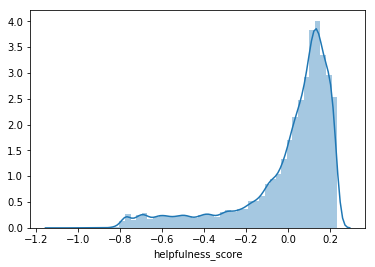

In [64]:
sns.distplot((y_test-predictions),bins=50);

In [60]:
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulness_score,user_deviation,review_delay,stem_words,lem_words,stem_sim_words,lem_sim_words
0,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",0.800000,1.399189,6652800,"['im', 'profession', 'otr', 'truck', 'driver',...","['im', 'professional', 'otr', 'truck', 'driver...",['5'],"['rand', 'route', 'weight', 'take', 'time', 'l..."
1,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",0.955556,0.624437,0,"['well', 'say', 'ive', 'unit', 'truck', 'four'...","['well', 'say', 'ive', 'unit', 'truck', 'four'...",[],"['dock', 'feature', 'car', 'determine', 'home'..."
2,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",0.900000,0.510375,6566400,"['go', 'write', 'long', 'review', 'even', 'tho...","['going', 'write', 'long', 'review', 'even', '...",[],"['screen', 'road', 'rand', 'route', 'truck', '..."
3,A3QH8VQDE7HZCR,0972683275,costaricachris,"[15, 19]",Quality was excellent. Instructions were clear...,5.0,Real value for the money,1286236800,"10 5, 2010",0.789474,0.442171,2678400,"['qualiti', 'excel', 'instruct', 'clear', 'cle...","['quality', 'excellent', 'instruction', 'clear...",[],"['level', 'hardware']"
4,A38FGQVJM18OWV,0972683275,"George S. Mitchell ""gsmitchell""","[8, 18]",I checked around Amazon as well as some other ...,1.0,What a piece of junk!,1291161600,"12 1, 2010",0.444444,1.616074,7603200,"['check', 'around', 'amazon', 'well', 'site', ...","['checked', 'around', 'amazon', 'well', 'site'...",[],"['tv', 'mount']"


In [5]:
meta_data = pd.read_csv('meta_data_latest.csv')

In [6]:
meta_data.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand,stem_words,lem_words
0,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[['Electronics', 'GPS & Navigation', 'Vehicle ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN,"['predecessor', 'intellirout', 'devic', 'navig...","['predecessor', 'intelliroute', 'device', 'nav..."
1,0972683275,http://ecx.images-amazon.com/images/I/41hYJ9Mw...,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,{},"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,"['tv', 'mount', 'solut', 'lcd', 'tv', 'mount',...","['tv', 'mount', 'solution', 'lcd', 'tv', 'moun..."
2,1400532620,http://ecx.images-amazon.com/images/I/519ca3cu...,Barnes & Noble Nook eReader - no 3GMeet nook. ...,"[['Electronics', 'eBook Readers & Accessories']]",Barnes &amp; Noble Nook eReader - no 3G,74.95,{'Electronics': 23071},"{'also_bought': ['B0035CLBT4', 'B004X18N24', '...",Barnes &amp; Noble,"['eread', 'nook', 'access', 'wifi', 'brows', '...","['ereader', 'nook', 'access', 'wifi', 'browse'..."
3,140053271X,http://ecx.images-amazon.com/images/I/51jat7CV...,Barnes & Noble Nook Simple Touch Wi-Fi ReaderI...,"[['Electronics', 'eBook Readers & Accessories'...",Barnes &amp; Noble Nook Simple Touch eBook Rea...,79.49,NaN,"{'also_bought': ['B007UXNHNM', 'B007UXNHGY', '...",Barnes &amp; Noble,"['wifi', 'touch', 'batteri', 'life', 'ink', 'd...","['wifi', 'touch', 'battery', 'life', 'ink', 'd..."
4,1400532736,http://ecx.images-amazon.com/images/I/413fSdlM...,The NOOK Simple Touch eReader allows you to re...,"[['Electronics', 'eBook Readers & Accessories'...",Nook Simple Touch eReader,62.99,{'Electronics': 4945},"{'also_bought': ['B0055ZDRI2', 'B007UXNHGY', '...",Barnes &amp; Noble,"['eread', 'display', 'devic', 'conveni', 'read...","['ereader', 'display', 'device', 'convenience'..."


In [7]:
df2['stem_sim_words'][0]

"['5']"

In [8]:
print(type(df2['lem_words'][1]))

<class 'str'>


In [9]:
words = ast.literal_eval(df2['lem_words'][0])

NameError: name 'ast' is not defined

In [115]:
#words[3]

In [114]:
#meta_data[meta_data['asin']=='0528881469']['stem_words'][0]

In [113]:
#get_stem_sim_words('0528881469', ['predecessor'])

In [10]:
import ast

In [112]:
# ast.literal_eval(meta_data[meta_data['asin']=='140053271X']['stem_words'].iloc[0])

In [11]:
def get_stem_sim_words(pid, stem_words) :
    # Get the stem words of the product
    desc_stem=ast.literal_eval(meta_data[meta_data['asin']==pid]['stem_words'].iloc[0])
    #print('Desc_stem:',desc_stem)
    # Find the Intersection of words
    #print("type of stem_words ",type(stem_words))
    #print("stem_words: ",stem_words)
    stem_list = ast.literal_eval(stem_words)
    #print("type of stem_list: ",type(stem_list))
    #print("stem_list: ",stem_list)
    sim_words=list(set(desc_stem).intersection(stem_list))
    # return the words
    return sim_words

In [19]:
get_stem_sim_words('1400532736', "['predecessor']")

[]

In [20]:
try_df =df2.head()

In [21]:
try_df['stem_sim_words'] = try_df.swifter.apply(lambda row: get_stem_sim_words(row['asin'],row['stem_words']), axis=1)

Pandas Apply: 100%|█████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 109.22it/s]
C:\Users\Trishul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df2.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulness_score,user_deviation,review_delay,stem_words,lem_words,stem_sim_words,lem_sim_words
81270,APRNS6DB68LLV,B00L26YDA4,"Rob Slaven ""slavenrm@gmail. com""","[5, 10]",As usual I received this item for free in exch...,5.0,Works brilliantly once you understand what it ...,1404172800,"07 1, 2014",0.500000,0.597583,432000,"['usual', 'receiv', 'item', 'free', 'exchang',...","['usual', 'received', 'item', 'free', 'exchang...",[],"['receiver', 'speaker', 'get', 'wifi', 'need']"
81271,A3A4ZAIBQWKOZS,B00L26YDA4,Stephen M. Lerch,"[10, 15]",Want to add wireless audio streaming to your h...,5.0,Smart,1403827200,"06 27, 2014",0.666667,0.546834,86400,"['want', 'add', 'wireless', 'audio', 'stream',...","['want', 'add', 'wireless', 'audio', 'streamin...",[],"['receiver', 'music', 'connection', 'wifi', 's..."
81272,A18R0PC372EGL,B00L3YHF6O,Blues,"[7, 11]",Wow...that's about all I have to say. Having ...,5.0,To use a technical term...Wow!,1404950400,"07 10, 2014",0.636364,0.448464,259200,"['wowthat', 'say', 'prior', 'experi', 'bt', 's...","['wowthats', 'say', 'prior', 'experience', 'bt...",[],"['fidelity', 'pair', 'performance', 'sound', '..."
81273,A3OOQH73VQ97VN,B00L3YHF6O,"Jem ""Microsoft""","[5, 12]",Update 14 July 2014: they have a white paper a...,5.0,Purely Cons Review,1404777600,"07 8, 2014",0.416667,0.742179,86400,"['updat', '14', 'juli', '2014', 'white', 'pape...","['update', '14', 'july', '2014', 'white', 'pap...",['g'],"['sbx', 'control', 'audio', 'pair', 'power', '..."
81274,A3A4ZAIBQWKOZS,B00L3YHF6O,Stephen M. Lerch,"[18, 23]",My short review:If you have the money to spend...,5.0,Best sounding speaker at this price range,1404691200,"07 7, 2014",0.782609,0.546834,0,"['short', 'reviewif', 'money', 'spend', 'speak...","['short', 'reviewif', 'money', 'spend', 'speak...","['n', 'w']","['control', 'audio', 'pc', 'connection', 'pair..."


In [25]:
df2['stem_sim_words'] = df2.swifter.apply(lambda row: get_stem_sim_words(row['asin'],row['stem_words']), axis=1)

Pandas Apply: 100%|█████████████████████████████████████████████████████████████| 81275/81275 [05:23<00:00, 251.35it/s]


In [26]:
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulness_score,user_deviation,review_delay,stem_words,lem_words,stem_sim_words,lem_sim_words
0,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",0.800000,1.399189,6652800,"['im', 'profession', 'otr', 'truck', 'driver',...","['im', 'professional', 'otr', 'truck', 'driver...","[truck, length, rout, tnd, address, rand, time...","['rand', 'route', 'weight', 'take', 'time', 'l..."
1,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",0.955556,0.624437,0,"['well', 'say', 'ive', 'unit', 'truck', 'four'...","['well', 'say', 'ive', 'unit', 'truck', 'four'...","[determin, rand, page, inform, car, home, scre...","['dock', 'feature', 'car', 'determine', 'home'..."
2,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",0.900000,0.510375,6566400,"['go', 'write', 'long', 'review', 'even', 'tho...","['going', 'write', 'long', 'review', 'even', '...","[truck, screen, road, well, rout, tnd, street,...","['screen', 'road', 'rand', 'route', 'truck', '..."
3,A3QH8VQDE7HZCR,0972683275,costaricachris,"[15, 19]",Quality was excellent. Instructions were clear...,5.0,Real value for the money,1286236800,"10 5, 2010",0.789474,0.442171,2678400,"['qualiti', 'excel', 'instruct', 'clear', 'cle...","['quality', 'excellent', 'instruction', 'clear...","[hardwar, level]","['level', 'hardware']"
4,A38FGQVJM18OWV,0972683275,"George S. Mitchell ""gsmitchell""","[8, 18]",I checked around Amazon as well as some other ...,1.0,What a piece of junk!,1291161600,"12 1, 2010",0.444444,1.616074,7603200,"['check', 'around', 'amazon', 'well', 'site', ...","['checked', 'around', 'amazon', 'well', 'site'...","[mount, tv]","['tv', 'mount']"


In [27]:
df2['stem_sim_length'] = df2['stem_sim_words'].swifter.apply(len)

Pandas Apply: 100%|██████████████████████████████████████████████████████████| 81275/81275 [00:00<00:00, 533388.92it/s]


In [28]:
df2['helpfulness_score'].corr(df2['stem_sim_length'])

0.17040031848708057

In [29]:
def get_lem_sim_words(pid, lem_words) :
    # Get the stem words of the product
    desc_lem=ast.literal_eval(meta_data[meta_data['asin']==pid]['lem_words'].iloc[0])
    lem_list = ast.literal_eval(lem_words)
    sim_words=list(set(desc_lem).intersection(lem_list))
    return sim_words

In [30]:
df2['lem_sim_words'] = df2.swifter.apply(lambda row: get_lem_sim_words(row['asin'],row['lem_words']), axis=1)

Pandas Apply: 100%|█████████████████████████████████████████████████████████████| 81275/81275 [05:27<00:00, 248.50it/s]


In [31]:
df2['lem_sim_words'].head()

0    [truck, length, address, tnd, rand, time, stre...
1    [rand, ease, car, home, feature, screen, well,...
2    [truck, screen, road, well, tnd, street, rand,...
3                                    [hardware, level]
4                                          [mount, tv]
Name: lem_sim_words, dtype: object

In [32]:
df2['lem_sim_length'] = df2['lem_sim_words'].swifter.apply(len)

Pandas Apply: 100%|██████████████████████████████████████████████████████████| 81275/81275 [00:00<00:00, 597601.23it/s]


In [33]:
df2['helpfulness_score'].corr(df2['lem_sim_length'])

0.17191611968338297

In [34]:
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulness_score,user_deviation,review_delay,stem_words,lem_words,stem_sim_words,lem_sim_words,stem_sim_length,lem_sim_length
0,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",0.800000,1.399189,6652800,"['im', 'profession', 'otr', 'truck', 'driver',...","['im', 'professional', 'otr', 'truck', 'driver...","[truck, length, rout, tnd, address, rand, time...","[truck, length, address, tnd, rand, time, stre...",15,13
1,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",0.955556,0.624437,0,"['well', 'say', 'ive', 'unit', 'truck', 'four'...","['well', 'say', 'ive', 'unit', 'truck', 'four'...","[determin, rand, page, inform, car, home, scre...","[rand, ease, car, home, feature, screen, well,...",24,23
2,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",0.900000,0.510375,6566400,"['go', 'write', 'long', 'review', 'even', 'tho...","['going', 'write', 'long', 'review', 'even', '...","[truck, screen, road, well, rout, tnd, street,...","[truck, screen, road, well, tnd, street, rand,...",17,16
3,A3QH8VQDE7HZCR,0972683275,costaricachris,"[15, 19]",Quality was excellent. Instructions were clear...,5.0,Real value for the money,1286236800,"10 5, 2010",0.789474,0.442171,2678400,"['qualiti', 'excel', 'instruct', 'clear', 'cle...","['quality', 'excellent', 'instruction', 'clear...","[hardwar, level]","[hardware, level]",2,2
4,A38FGQVJM18OWV,0972683275,"George S. Mitchell ""gsmitchell""","[8, 18]",I checked around Amazon as well as some other ...,1.0,What a piece of junk!,1291161600,"12 1, 2010",0.444444,1.616074,7603200,"['check', 'around', 'amazon', 'well', 'site', ...","['checked', 'around', 'amazon', 'well', 'site'...","[mount, tv]","[mount, tv]",2,2


In [35]:
df2.to_csv('Review_Meta_Data.csv')

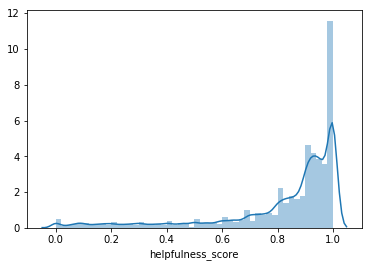

In [149]:
sns.distplot(df2['helpfulness_score'])

In [157]:
len(df2[df2['helpfulness_score']<0.7])

15223

In [155]:
len(df2[df2['helpfulness_score']>=0.9])

45190

In [158]:
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulness_score,user_deviation,review_delay,stem_words,lem_words,stem_sim_words,lem_sim_words,stem_sim_length,lem_sim_length
0,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",0.800000,1.399189,6652800,"['im', 'profession', 'otr', 'truck', 'driver',...","['im', 'professional', 'otr', 'truck', 'driver...","[home, devic, weight, gp, rout, time, drive, t...","[home, take, weight, time, route, truck, addre...",15,13
1,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",0.955556,0.624437,0,"['well', 'say', 'ive', 'unit', 'truck', 'four'...","['well', 'say', 'ive', 'unit', 'truck', 'four'...","[well, tool, rout, intellirout, connect, dock,...","[well, tool, determine, ease, dock, car, gps, ...",24,23
2,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",0.900000,0.510375,6566400,"['go', 'write', 'long', 'review', 'even', 'tho...","['going', 'write', 'long', 'review', 'even', '...","[way, well, rout, gp, take, track, car, time, ...","[way, well, take, track, car, route, tnd, time...",17,16
3,A3QH8VQDE7HZCR,0972683275,costaricachris,"[15, 19]",Quality was excellent. Instructions were clear...,5.0,Real value for the money,1286236800,"10 5, 2010",0.789474,0.442171,2678400,"['qualiti', 'excel', 'instruct', 'clear', 'cle...","['quality', 'excellent', 'instruction', 'clear...","[hardwar, level]","[hardware, level]",2,2
4,A38FGQVJM18OWV,0972683275,"George S. Mitchell ""gsmitchell""","[8, 18]",I checked around Amazon as well as some other ...,1.0,What a piece of junk!,1291161600,"12 1, 2010",0.444444,1.616074,7603200,"['check', 'around', 'amazon', 'well', 'site', ...","['checked', 'around', 'amazon', 'well', 'site'...","[tv, mount]","[tv, mount]",2,2
